In [31]:
import os
import sys
import webbrowser
import pandas as pd
import yahoo_fin.stock_info as si
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings

In [32]:
# path to my modules >>
my_lib_path=os.getcwd() + r"\my_lib"

# add path to sys.path list >>
sys.path.append(my_lib_path)

print('\nList of module paths:')
display(sys.path)


List of module paths:


['C:\\Users\\mixas\\trading_capm',
 'C:\\Users\\mixas\\anaconda3\\python311.zip',
 'C:\\Users\\mixas\\anaconda3\\DLLs',
 'C:\\Users\\mixas\\anaconda3\\Lib',
 'C:\\Users\\mixas\\anaconda3',
 '',
 'C:\\Users\\mixas\\AppData\\Roaming\\Python\\Python311\\site-packages',
 'C:\\Users\\mixas\\anaconda3\\Lib\\site-packages',
 'C:\\Users\\mixas\\anaconda3\\Lib\\site-packages\\win32',
 'C:\\Users\\mixas\\anaconda3\\Lib\\site-packages\\win32\\lib',
 'C:\\Users\\mixas\\anaconda3\\Lib\\site-packages\\Pythonwin',
 'C:\\Users\\mixas\\trading_capm\\path1\\my_lib',
 'C:\\Users\\mixas\\trading_capm\\path1\\my_lib',
 'C:\\Users\\mixas\\trading_capm\\path1\\my_lib',
 'C:\\Users\\mixas\\trading_capm\\path1\\my_lib']

In [33]:
fileName = r"C:/Users/mixas/trading_capm/3mT-bill_.xlsx"
tb = pd.read_excel(fileName +'.xlsx', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/mixas/trading_capm/3mT-bill_.xlsx.xlsx'

In [3]:
display(tb.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1251 entries, 2016-04-11 to 2021-04-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tbill   1251 non-null   float64
dtypes: float64(1)
memory usage: 19.5 KB


None


T-Bill from 2016-04-11 00:00:00  to 2021-04-09 00:00:00


<Axes: xlabel='date'>

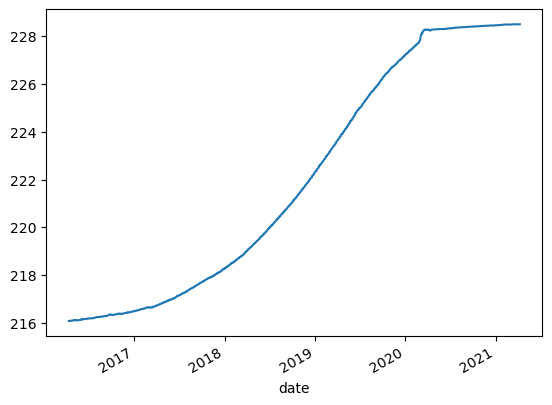

In [4]:
s = tb.index.min()
e = tb.index.max()
print('\nT-Bill from',s,' to',e)
tb['tbill'].plot()

date
2016-04-11         NaN
2016-04-12    0.000000
2016-04-13    0.000000
2016-04-14    0.000000
2016-04-15    0.000046
                ...   
2021-04-05    0.000000
2021-04-06    0.000000
2021-04-07    0.000000
2021-04-08    0.000000
2021-04-09    0.000000
Name: rf, Length: 1251, dtype: float64

<Axes: xlabel='date'>

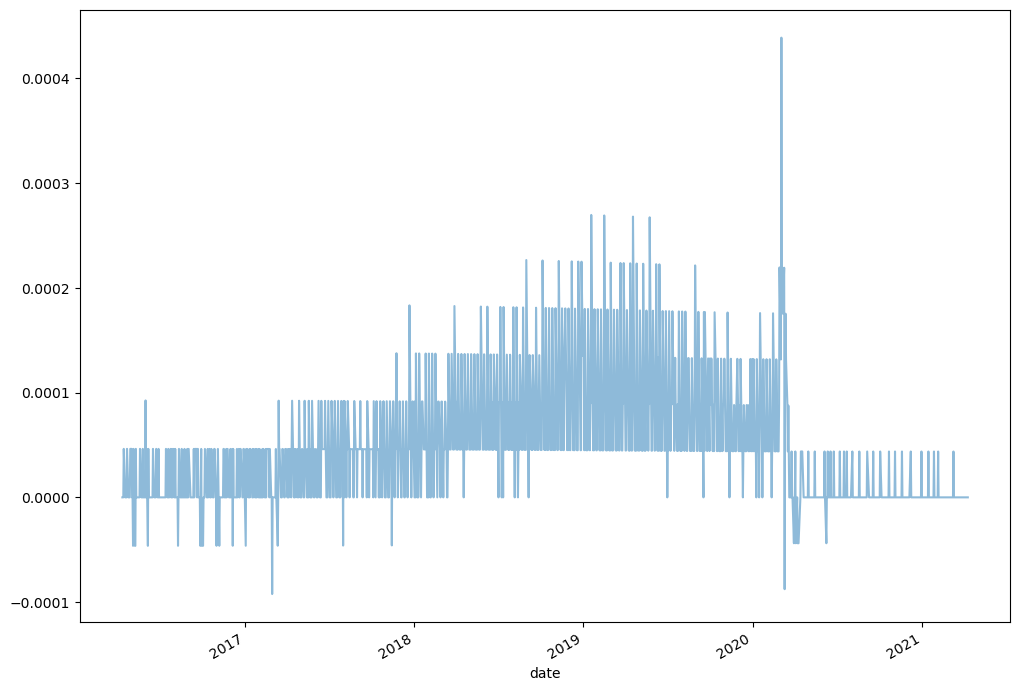

In [5]:
# returns >>>
tb['rf'] = tb['tbill'].pct_change()

display(tb.rf)

tb.rf.plot(alpha=0.5, figsize=(12,9))

AMD NVDA DELL 

<Axes: >

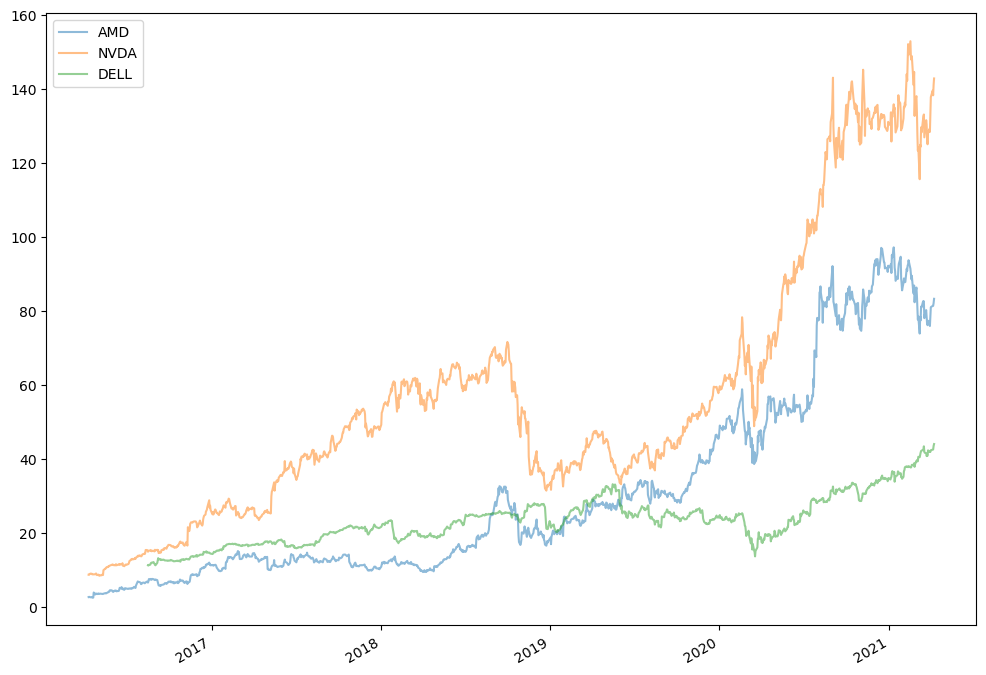

In [8]:

assets = ['AMD', 'NVDA', 'DELL']

data=pd.DataFrame()

for i in assets:
 print(i, end=" ")
 tmp=si.get_data(i, start_date=s, end_date=e)
 data[i]=tmp['adjclose']

data.plot(alpha=0.5, figsize=(12,9))

,AMD,NVDA,DELL
2016-04-11,NaN,NaN,NaN
2016-04-12,0.018116,-0.001115,NaN
2016-04-13,-0.003559,0.025112,NaN
2016-04-14,-0.028571,0.002722,NaN
2016-04-15,-0.007353,0.007872,NaN
...,...,...,...
2021-04-01,0.032994,0.034724,0.010550
2021-04-05,0.004193,0.012725,0.003143
2021-04-06,0.000123,-0.009008,0.001343
2021-04-07,0.009332,0.020344,0.022687


<Axes: >

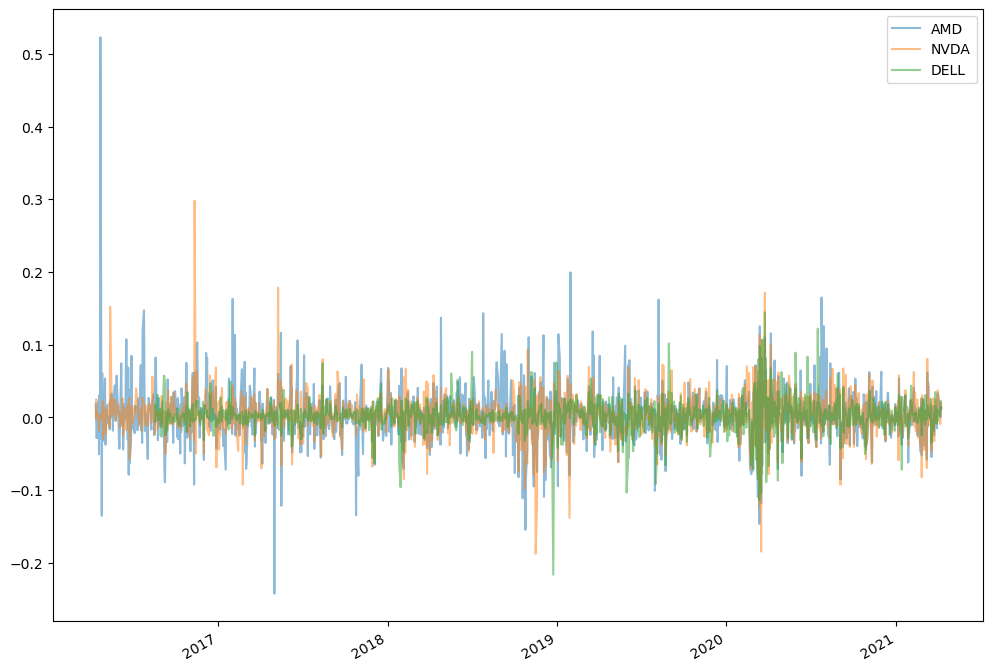

In [9]:
# returns >>>
Y = data[assets].pct_change()

display(Y)

Y.plot(alpha=0.5, figsize=(12,9))

'AMD'

'NVDA'

'DELL'

,pAMD,pNVDA,pDELL
2016-04-11,NaN,NaN,NaN
2016-04-12,0.018116,-0.001115,NaN
2016-04-13,-0.003559,0.025112,NaN
2016-04-14,-0.028571,0.002722,NaN
2016-04-15,-0.007399,0.007826,NaN
...,...,...,...
2021-04-05,0.004193,0.012725,0.003143
2021-04-06,0.000123,-0.009008,0.001343
2021-04-07,0.009332,0.020344,0.022687
2021-04-08,0.013990,0.012267,0.011693


<Axes: >

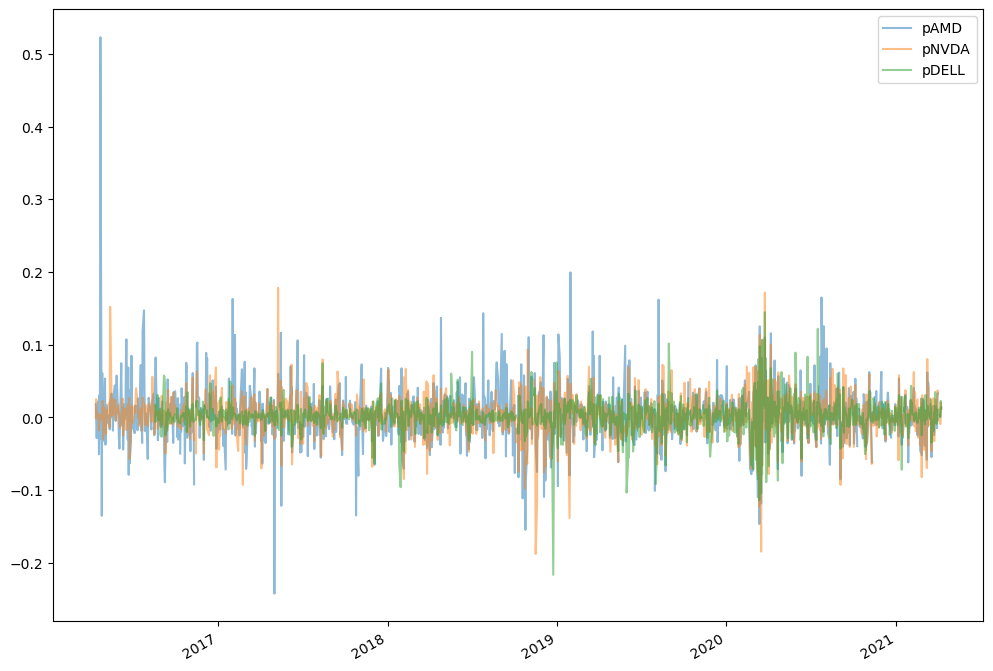

In [10]:
df=pd.DataFrame()

# market & risk premium
for i in assets:
 display(i)
 n = 'p'+i    # <- new column name
 df[n]=Y[i]-tb.rf

display(df)

df.plot(alpha=0.5, figsize=(12,9))

In [11]:
### OLS >>>
reg1 = sm.OLS(df.iloc[:,1], df.iloc[:,0], missing='drop').fit()

In [12]:
### OLS >>>
reg2 = sm.OLS(df.iloc[:,2], df.iloc[:,0], missing='drop').fit()

In [13]:
info_dict={'Observations' : lambda x: f"{int(x.nobs):d}",
        'R-sq.' : lambda x: f"{x.rsquared:.3f}",
        'F' : lambda x: f"{x.fvalue:.1f}",
        'F p-value' : lambda x: f"{x.f_pvalue:.3f}"}
results_table = summary_col(results=[reg1,reg2],
                 float_format='%0.2f',
                 stars = True,
                 model_names=assets[1:],
                 info_dict=info_dict)
results_table.add_title('CAPM: OLS Regressions')
print(results_table)

NameError: name 'summary_col' is not defined